<a href="https://colab.research.google.com/github/gauravreddy08/deep-learning-tensorflow/blob/main/notebooks/nlp_tfcourse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-ce15062e-4713-70e8-00f5-69bc014e57ba)


In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2023-01-27 08:59:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-01-27 08:59:43 (88.6 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



# Getting the text dataset

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

unzip_data("/content/nlp_getting_started.zip")

--2023-01-27 08:59:46--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip.1’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2023-01-27 08:59:47 (141 MB/s) - ‘nlp_getting_started.zip.1’ saved [607343/607343]



# Become ONE with the data

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [6]:
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [7]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [8]:
len(train), len(test)

(7613, 3263)

In [9]:
train = train.sample(frac=1, random_state=42)
train.value_counts()

id     keyword   location                        text                                                                                                                                 target
48     ablaze    Birmingham                      @bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C                                                                              1         1
7166   mudslide  Chiswick, London                2 great new recipes; mudslide cake and so sorry stew! #GBBO                                                                          0         1
7178   mudslide  Edinburgh                       @hazelannmac ooh now I feel guilty about wishing hatman out. I bet the mudslide was delicious!                                       0         1
7176   mudslide  London                          First impressions: glad hat man is leaving in lieu of more interesting ladies. Hope mudslide lady triumphs next week.                0         1
7174   mudslide  The Pumpkin Carria

https://www.tensorflow.org/tutorials/structured_data/imbalanced_data

# Visualizing the data

In [10]:
import random

for i in [random.randint(0, len(train)) for _ in range(5)]:
  print(f"Text: {train['text'][i]}")
  print("Label: ", "Disaster" if train['target'][i]==1 else "Not a Disaster")
  print("\n----\n")

Text: Plains All American Pipeline company may have spilled 40 percent more crude oil than previously estimated.... http://t.co/WEZjqC4Cf2
Label:  Disaster

----

Text: #MrRobinson is giving me #TheSteveHarveyShow vibe. Music teacher looks out for students has crush on girl he went to high school with. ??
Label:  Not a Disaster

----

Text: 10News ? Water main break disrupts trolley service http://t.co/pAug7a68i0
Label:  Disaster

----

Text: VIDEO: 'We're picking up bodies from water': Rescuers are searching for hundreds of migrants in the Mediterranean after a boat carryi...
Label:  Disaster

----

Text: @DaMidnighter theres actually a theory out there that the magisters arent the only reason for the blight
that dwarves (the ones from the
Label:  Not a Disaster

----



In [11]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train['text'].to_numpy(), train['target'].to_numpy(), test_size=0.1, random_state=42)

In [12]:
len(X_train), len(X_val), len(y_train), len(y_val)

(6851, 762, 6851, 762)

In [13]:
X_train

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       ...,
       'Near them on the sand half sunk a shattered visage lies... http://t.co/0kCCG1BT06',
       "kesabaran membuahkan hasil indah pada saat tepat! life isn't about waiting for the storm to pass it's about learning to dance in the rain.",
       "@ScottDPierce @billharris_tv @HarrisGle @Beezersun I'm forfeiting this years fantasy football pool out of fear I may win n get my ass kicked"],
      dtype=object)

In [14]:
y_train

array([0, 0, 1, ..., 1, 1, 0])

In [15]:
X_train[0]

'@mogacola @zamtriossu i screamed after hitting tweet'

In [16]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

output_sequence_length = round(sum((len(i.split()) for i in X_train))/len(X_train)) #15

text_vectorizer = TextVectorization(max_tokens=10000,
                                    standardize='lower_and_strip_punctuation',
                                    split='whitespace',
                                    ngrams=None,
                                    output_mode="int",
                                    output_sequence_length = output_sequence_length,
                                    pad_to_max_tokens=True)

In [17]:
text_vectorizer.adapt(X_train)

In [18]:
for i in [random.choice(X_train) for _ in range(5)]:
  print(f"Orginal Text: {i}")
  print(f"Vectorized: {text_vectorizer(i)}")
  print("\n----\n")

Orginal Text: @harveymaine AAAA ok lemme move to another roomr so no one hears my gay ass screams
Vectorized: [   1    1  391    1  769    5  165 8983   28   40   61    1   13 1672
  227]

----

Orginal Text: @MrTophyPup it's bloody sexy *drools*
Vectorized: [   1   37  261 3430    1    0    0    0    0    0    0    0    0    0
    0]

----

Orginal Text: @TayIorrMade @MegatronAFC possibly he's had injuries on both ankles though. 2011 one worse but regardless both.
Vectorized: [7775    1 3524  277   94  267   11  608    1  804 1564   61 1100   30
 4775]

----

Orginal Text: @Gargron good sir I did not wish to but now I am forced to. I must obliterate you
Vectorized: [   1  136 1590    8  145   34 1160    5   30   48    8  160 2107    5
    8]

----

Orginal Text: #Russian food crematoria provokes outrage amid crisis famine memories http://t.co/FjeaFgbZfJ
Vectorized: [ 835  260 1147 9513  935  714  745  459  647    1    0    0    0    0
    0]

----



In [19]:
from scipy.optimize._lsq.common import print_header_linear
print_header_linear

<function scipy.optimize._lsq.common.print_header_linear()>

In [20]:
print(text_vectorizer.get_vocabulary())

['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is', 'for', 'on', 'you', 'my', 'with', 'it', 'that', 'at', 'by', 'this', 'from', 'be', 'are', 'was', 'have', 'like', 'as', 'up', 'so', 'just', 'but', 'me', 'im', 'your', 'not', 'amp', 'out', 'its', 'will', 'an', 'no', 'has', 'fire', 'after', 'all', 'when', 'we', 'if', 'now', 'via', 'new', 'more', 'get', 'or', 'about', 'what', 'he', 'people', 'news', 'been', 'over', 'one', 'how', 'dont', 'they', 'who', 'into', 'were', 'do', 'us', '2', 'can', 'video', 'emergency', 'there', 'disaster', 'than', 'police', 'would', 'his', 'still', 'her', 'some', 'body', 'storm', 'crash', 'burning', 'suicide', 'back', 'man', 'california', 'why', 'time', 'them', 'had', 'buildings', 'rt', 'first', 'cant', 'see', 'got', 'day', 'off', 'our', 'going', 'nuclear', 'know', 'world', 'bomb', 'fires', 'love', 'killed', 'go', 'attack', 'youtube', 'dead', 'two', 'families', '3', 'train', 'full', 'being', 'war', 'many', 'today', 'think', 'only', 'car', 'accident', 'l

In [21]:
tf.random.set_seed(42)

embedding = tf.keras.layers.Embedding(input_dim=10000, # set input shape
                                      output_dim=128, # set size of embedding vector
                                      embeddings_initializer="uniform", # default, intialize randomly
                                      input_length=15, # how long is each input
                                      name="embedding_1")

embedding

In [22]:
for i in [random.choice(X_train) for _ in range(1)]:
  print(f"Orginal Text: {i}")
  emb = embedding(text_vectorizer(i))
  print(f"Embedded: {emb}")
  print("\n----\n")

Orginal Text: Devastation: coming to a @Target and find the @Starbucks closed ?? #momneedscoffee #asap #iwontmakeit
Embedded: [[-0.01128238 -0.01936185  0.03642451 ... -0.01263402  0.00118983
   0.03924635]
 [-0.03560989  0.03051921 -0.00087172 ... -0.00997615  0.01590313
  -0.03331258]
 [-0.03521683 -0.00981399 -0.00284491 ... -0.04792733 -0.01664252
  -0.03293632]
 ...
 [ 0.03977952 -0.03782602 -0.03646283 ...  0.00236253  0.03332629
   0.02803668]
 [ 0.01645621 -0.00589932 -0.01471175 ... -0.02511839  0.00912381
  -0.00024097]
 [ 0.01645621 -0.00589932 -0.01471175 ... -0.02511839  0.00912381
  -0.00024097]]

----



## Model 0 : Naive Bayes (baseline)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()), 
    ("text", MultinomialNB())
                    ])

model_0.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('text', MultinomialNB())])

In [24]:
baseline_score = model_0.score(X_val, y_val)
print(f"Baseline Model Accuracy Score: {baseline_score*100:.2f}%")

Baseline Model Accuracy Score: 79.27%


In [25]:
baseline_preds = model_0.predict(X_val)
baseline_preds[:10]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def evaluate_model(true, pred):
  print("Classification Report:\n")
  print(classification_report(true, pred, ))

  return {"accuracy": accuracy_score(true, pred),
          "precision": precision_score(true, pred, average="weighted"),
          "recall": recall_score(true, pred, average="weighted"),
          "f1": f1_score(true, pred, average="weighted")}

In [27]:
baseline_results = evaluate_model(y_val, baseline_preds)

Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       414
           1       0.89      0.63      0.73       348

    accuracy                           0.79       762
   macro avg       0.82      0.78      0.78       762
weighted avg       0.81      0.79      0.79       762



## Model 1 : Dense Model (Feed-forward NN)

In [28]:
SAVE_DIR = "model_logs"

In [29]:
tf.random.set_seed(42)

embedding = tf.keras.layers.Embedding(input_dim=10000, # set input shape
                                      output_dim=128, # set size of embedding vector
                                      embeddings_initializer="uniform", # default, intialize randomly
                                      input_length=15, # how long is each input
                                      name="embedding_1")

embedding

In [30]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string)

x = text_vectorizer(inputs)
x = embedding(x)

x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_1 = tf.keras.Model(inputs, outputs)
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
Non-train

In [31]:
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [32]:
# embed_weights = model_1.get_layer("embedding_1").get_weights()[0]

# import io

# # Create output writers
# out_v = io.open("prev-emb-vectors.tsv", "w", encoding="utf-8")
# out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# words_in_vocab = text_vectorizer.get_vocabulary()

# # Write embedding vectors and words to file
# for num, word in enumerate(words_in_vocab):
#   if num == 0: 
#      continue # skip padding token
#   vec = embed_weights[num]
#   out_m.write(word + "\n") # write words to file
#   out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
# out_v.close()
# out_m.close()

# # Download files locally to upload to Embedding Projector
# try:
#   from google.colab import files
# except ImportError:
#   pass
# else:
#   files.download("prev-emb-vectors.tsv")
#   files.download("embedding_metadata.tsv")

In [33]:
model_1_history = model_1.fit(x = X_train, y = y_train,
                              epochs = 5,
                              validation_data = (X_val, y_val),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "model_1")])

Saving TensorBoard log files to: model_logs/model_1/20230127-085950
Epoch 1/5
215/215 [==============================] - 4s 10ms/step - loss: 0.6094 - accuracy: 0.6916 - val_loss: 0.5357 - val_accuracy: 0.7572
Epoch 2/5
215/215 [==============================] - 2s 7ms/step - loss: 0.4410 - accuracy: 0.8189 - val_loss: 0.4691 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 2s 7ms/step - loss: 0.3463 - accuracy: 0.8605 - val_loss: 0.4590 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.2848 - accuracy: 0.8923 - val_loss: 0.4641 - val_accuracy: 0.7927
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.2380 - accuracy: 0.9118 - val_loss: 0.4767 - val_accuracy: 0.7874


In [34]:
model_1_preds = model_1.predict(X_val)
print(model_1.evaluate(X_val, y_val))

model_1_preds = tf.squeeze(tf.round(model_1_preds))

24/24 [==============================] - 0s 5ms/step - loss: 0.4767 - accuracy: 0.7874
[0.4766846001148224, 0.787401556968689]


In [35]:
model_1_results = evaluate_model(y_val, model_1_preds)

Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       414
           1       0.82      0.68      0.75       348

    accuracy                           0.79       762
   macro avg       0.79      0.78      0.78       762
weighted avg       0.79      0.79      0.78       762



In [36]:
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

In [37]:
# embed_weights = model_1.get_layer("embedding_1").get_weights()[0]

# # Create output writers
# out_v = io.open("new-emb-vectors.tsv", "w", encoding="utf-8")

# words_in_vocab = text_vectorizer.get_vocabulary()

# # Write embedding vectors and words to file
# for num, word in enumerate(words_in_vocab):
#   if num == 0: 
#      continue # skip padding token
#   vec = embed_weights[num]
#   out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
# out_v.close()

# # Download files locally to upload to Embedding Projector
# try:
#   from google.colab import files
# except ImportError:
#   pass
# else:
#   files.download("new-emb-vectors.tsv")

### Visualizing the weights

Go to http://projector.tensorflow.org/

## Recurrent Neural Networks (RNN's)

Read about RNNs in deep 

📖 Resources:

- MIT Deep Learning Lecture on Recurrent Neural Networks - explains the background of recurrent neural networks and introduces LSTMs.
- The Unreasonable Effectiveness of Recurrent Neural Networks by Andrej Karpathy - demonstrates the power of RNN's with examples generating various sequences.
- Understanding LSTMs by Chris Olah - an in-depth (and technical) look at the mechanics of the LSTM cell, possibly the most popular RNN building block.

## Model 2: LSTM

In [38]:
tf.random.set_seed(42)

embedding = tf.keras.layers.Embedding(input_dim=10000, # set input shape
                                      output_dim=128, # set size of embedding vector
                                      embeddings_initializer="uniform", # default, intialize randomly
                                      input_length=15, # how long is each input
                                      name="embedding_1")

embedding

In [39]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype='string')

x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)

# x = layers.LSTM(units=64, return_sequences=True)(x) # when stacking RNNs u need to use return_sequences as True, else it is a error bro
# # LSTM takes 3d vector as the input [batch, timestep, feature]. Dive deeper in TF docs
# print(x.shape)
x = layers.LSTM(units=64)(x)
# print(x.shape)

# x = layers.Dense(units=64, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

model_2.summary()

(None, 15, 128)
Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________

In [40]:
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [41]:
history_model_2 = model_2.fit(X_train, y_train,
                              epochs=5,
                              validation_data=(X_val, y_val),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "model_2")])

Saving TensorBoard log files to: model_logs/model_2/20230127-090001
Epoch 1/5
215/215 [==============================] - 7s 14ms/step - loss: 0.5100 - accuracy: 0.7416 - val_loss: 0.4566 - val_accuracy: 0.7822
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3176 - accuracy: 0.8717 - val_loss: 0.5138 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.2201 - accuracy: 0.9152 - val_loss: 0.5858 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1556 - accuracy: 0.9428 - val_loss: 0.6041 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1076 - accuracy: 0.9594 - val_loss: 0.8746 - val_accuracy: 0.7507


In [42]:
model_2_preds = tf.squeeze(tf.round(model_2.predict(X_val)))
model_2_preds[:10]

24/24 [==============================] - 1s 5ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [43]:
model_2.evaluate(X_val, y_val)

24/24 [==============================] - 0s 5ms/step - loss: 0.8746 - accuracy: 0.7507


[0.8746165633201599, 0.7506561875343323]

In [44]:
model_2_results = evaluate_model(y_val, model_2_preds)
model_2_results

Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       414
           1       0.75      0.67      0.71       348

    accuracy                           0.75       762
   macro avg       0.75      0.74      0.75       762
weighted avg       0.75      0.75      0.75       762



{'accuracy': 0.7506561679790026,
 'precision': 0.7510077975908164,
 'recall': 0.7506561679790026,
 'f1': 0.7489268622514025}

## Model 3: GRU 

In [45]:
tf.random.set_seed(42)

embedding = tf.keras.layers.Embedding(input_dim=10000, # set input shape
                                      output_dim=128, # set size of embedding vector
                                      embeddings_initializer="uniform", # default, intialize randomly
                                      input_length=15, # how long is each input
                                      name="embedding_1")

embedding

In [46]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype='string')

x = text_vectorizer(inputs)
x = embedding(x)

x = layers.GRU(units=64, return_sequences=False)(x) #set True if stacking
# x = layers.LSTM(units=99, return_sequences=True)(x)
# x = layers.GRU(units=64)(x)

outputs = layers.Dense(1, activation='sigmoid')(x)

model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [47]:
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [48]:
history_model_3 = model_3.fit(X_train, y_train,
                              epochs=5,
                              validation_data=(X_val, y_val),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "model_3")])

Saving TensorBoard log files to: model_logs/model_3/20230127-090026
Epoch 1/5
215/215 [==============================] - 7s 14ms/step - loss: 0.5242 - accuracy: 0.7314 - val_loss: 0.4553 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 1s 7ms/step - loss: 0.3195 - accuracy: 0.8694 - val_loss: 0.4937 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2197 - accuracy: 0.9181 - val_loss: 0.5607 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1599 - accuracy: 0.9441 - val_loss: 0.6220 - val_accuracy: 0.7782
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1221 - accuracy: 0.9584 - val_loss: 0.6205 - val_accuracy: 0.7677


In [49]:
model_3_preds = tf.squeeze(tf.round(model_3.predict(X_val)))
model_3_preds[:10]

24/24 [==============================] - 1s 5ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [50]:
model_3.evaluate(X_val, y_val)

24/24 [==============================] - 0s 3ms/step - loss: 0.6205 - accuracy: 0.7677


[0.6204835772514343, 0.7677165269851685]

In [51]:
model_3_results = evaluate_model(y_val, model_3_preds)
model_3_results

Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       414
           1       0.76      0.71      0.74       348

    accuracy                           0.77       762
   macro avg       0.77      0.76      0.76       762
weighted avg       0.77      0.77      0.77       762



{'accuracy': 0.7677165354330708,
 'precision': 0.7675450859410361,
 'recall': 0.7677165354330708,
 'f1': 0.7667932666650168}

## Model 4: Bidirectional RNNs

In [52]:
tf.random.set_seed(42)

embedding = tf.keras.layers.Embedding(input_dim=10000, # set input shape
                                      output_dim=128, # set size of embedding vector
                                      embeddings_initializer="uniform", # default, intialize randomly
                                      input_length=15, # how long is each input
                                      name="embedding_1")

embedding

In [53]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype='string')

x = text_vectorizer(inputs)
x = embedding(x)

x = layers.Bidirectional(layers.LSTM(64, return_sequences=False))(x) #set True if stacking
# x = layers.Bidirectional(layers.GRU(64, return_sequences=False))(x)
# x = layers.LSTM(units=99, return_sequences=True)(x)
# x = layers.GRU(units=64)(x)

outputs = layers.Dense(1, activation='sigmoid')(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_bidirectional")

model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [54]:
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [55]:
history_model_4 = model_4.fit(X_train, y_train,
                              epochs=5,
                              validation_data=(X_val, y_val),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "model_4")])

Saving TensorBoard log files to: model_logs/model_4/20230127-090042
Epoch 1/5
215/215 [==============================] - 6s 12ms/step - loss: 0.5093 - accuracy: 0.7481 - val_loss: 0.4606 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3135 - accuracy: 0.8708 - val_loss: 0.5144 - val_accuracy: 0.7690
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2150 - accuracy: 0.9178 - val_loss: 0.5626 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1523 - accuracy: 0.9469 - val_loss: 0.6365 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1083 - accuracy: 0.9639 - val_loss: 0.6509 - val_accuracy: 0.7664


In [56]:
model_4.evaluate(X_val, y_val)

24/24 [==============================] - 0s 5ms/step - loss: 0.6509 - accuracy: 0.7664


[0.6509270071983337, 0.7664042115211487]

In [57]:
model_4_preds = tf.squeeze(tf.round(model_4.predict(X_val)))
model_4_preds[:10]

24/24 [==============================] - 1s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [58]:
model_4_results = evaluate_model(y_val, model_4_preds)
model_4_results

Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       414
           1       0.77      0.70      0.73       348

    accuracy                           0.77       762
   macro avg       0.77      0.76      0.76       762
weighted avg       0.77      0.77      0.77       762



{'accuracy': 0.7664041994750657,
 'precision': 0.7665895370389821,
 'recall': 0.7664041994750657,
 'f1': 0.7651213533864446}

In [59]:
baseline_results

{'accuracy': 0.7926509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

## Model 5: CNN 1D

In [60]:
tf.random.set_seed(42)

embedding = tf.keras.layers.Embedding(input_dim=10000, # set input shape
                                      output_dim=128, # set size of embedding vector
                                      embeddings_initializer="uniform", # default, intialize randomly
                                      input_length=15, # how long is each input
                                      name="embedding_1")

embedding

In [61]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype='string')

x = text_vectorizer(inputs)
x = embedding(x)

x = layers.Conv1D(64, kernel_size=5)(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_conv1d")

model_5.summary()

Model: "model_5_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 11, 64)            41024     
                                                                 
 global_average_pooling1d_1   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 1)              

In [62]:
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [63]:
history_model_5 = model_5.fit(X_train, y_train,
                              epochs=5,
                              validation_data=(X_val, y_val),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "model_5")])

Saving TensorBoard log files to: model_logs/model_5/20230127-090056
Epoch 1/5
215/215 [==============================] - 3s 7ms/step - loss: 0.5206 - accuracy: 0.7443 - val_loss: 0.4708 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3227 - accuracy: 0.8685 - val_loss: 0.5087 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.2226 - accuracy: 0.9096 - val_loss: 0.5849 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1626 - accuracy: 0.9385 - val_loss: 0.6708 - val_accuracy: 0.7664
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1199 - accuracy: 0.9562 - val_loss: 0.7281 - val_accuracy: 0.7664


In [64]:
model_5.evaluate(X_val, y_val)

24/24 [==============================] - 0s 5ms/step - loss: 0.7281 - accuracy: 0.7664


[0.7281109690666199, 0.7664042115211487]

In [65]:
model_5_preds = tf.squeeze(tf.round(model_5.predict(X_val)))
model_5_preds[:10]

24/24 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [66]:
model_5_results = evaluate_model(y_val, model_5_preds)
model_5_results

Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       414
           1       0.75      0.73      0.74       348

    accuracy                           0.77       762
   macro avg       0.76      0.76      0.76       762
weighted avg       0.77      0.77      0.77       762



{'accuracy': 0.7664041994750657,
 'precision': 0.7660259457004495,
 'recall': 0.7664041994750657,
 'f1': 0.7660236549378696}

## Model 6: TF Hub Model

USE Feature Extrator : https://tfhub.dev/google/universal-sentence-encoder/1

In [67]:
import tensorflow_hub as hub

embedding = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", 
                           input_shape=[],
                           dtype='string',
                           trainable=False, 
                           name="USE")
embedding

In [68]:
model_6 = tf.keras.Sequential([
    embedding,
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
], name="model_6_use")

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_6.summary()

Model: "model_6_use"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [69]:
history_model_6 = model_6.fit(X_train, y_train,
                              epochs=5,
                              validation_data=(X_val, y_val),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "model_6")])

Saving TensorBoard log files to: model_logs/model_6/20230127-090113
Epoch 1/5
215/215 [==============================] - 7s 14ms/step - loss: 0.5008 - accuracy: 0.7892 - val_loss: 0.4478 - val_accuracy: 0.7966
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4144 - accuracy: 0.8133 - val_loss: 0.4369 - val_accuracy: 0.8058
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3998 - accuracy: 0.8212 - val_loss: 0.4329 - val_accuracy: 0.8110
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3925 - accuracy: 0.8266 - val_loss: 0.4288 - val_accuracy: 0.8110
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3860 - accuracy: 0.8276 - val_loss: 0.4309 - val_accuracy: 0.8123


In [70]:
model_6.evaluate(X_val, y_val)

24/24 [==============================] - 0s 10ms/step - loss: 0.4309 - accuracy: 0.8123


[0.43088313937187195, 0.8123359680175781]

In [71]:
model_6_preds = tf.squeeze(tf.round(model_6.predict(X_val)))
model_6_preds[:10]

24/24 [==============================] - 1s 10ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [72]:
model_6_results = evaluate_model(y_val, model_6_preds)
model_6_results

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       414
           1       0.84      0.73      0.78       348

    accuracy                           0.81       762
   macro avg       0.82      0.81      0.81       762
weighted avg       0.81      0.81      0.81       762



{'accuracy': 0.8123359580052494,
 'precision': 0.8148798668657973,
 'recall': 0.8123359580052494,
 'f1': 0.810686575717776}

In [73]:
all_results = {"baseline": baseline_results,
               "dense_model": model_1_results,
               "lstm": model_2_results,
               "gru": model_3_results,
               "bidirectional": model_4_results,
               "conv1d": model_5_results,
               "tfhub_use": model_6_results}
all_results = pd.DataFrame(all_results)
all_results = all_results.T

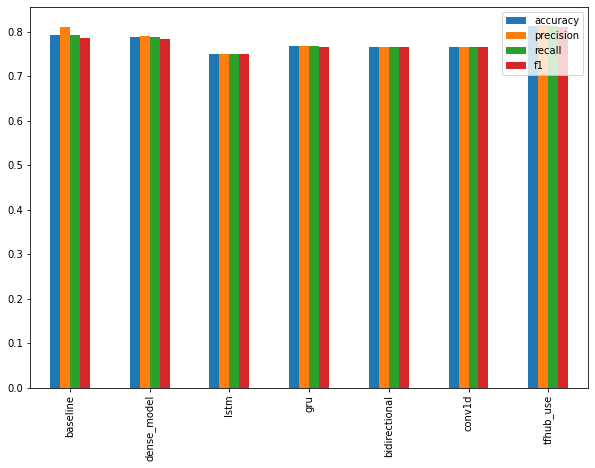

In [74]:
all_results.plot(kind='bar', figsize=(10, 7))

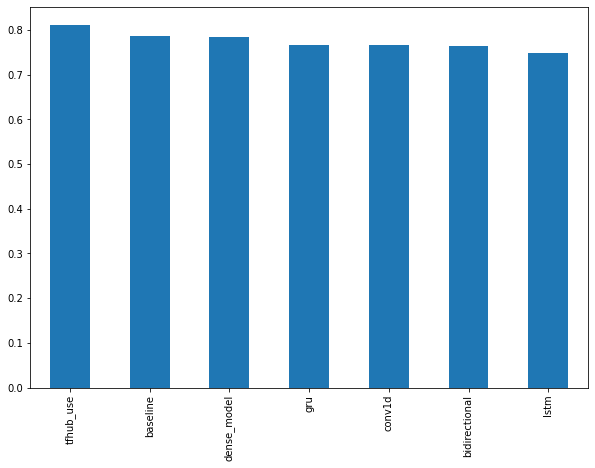

In [75]:
all_results.sort_values(['f1'], ascending=False)["f1"].plot(kind='bar', figsize=(10, 7))

In [ ]:
!tensorboard dev upload --logdir ./model_logs/ \
                                --name "NLP Modelling Experiments" \
                                --one_shot

https://tensorboard.dev/experiment/fBxrPnsXT7GM0e18U0ElwA